### Business understanding

As part of this analysis, the intent is to observe the trend in the technology industry over the years. The data is taken from stackoverflow survey from 2011 to 2021 and the following are the main questions of interest?

- Growth of Women in Technology?
- Which country has the most developers?
- Most popular Development Environment?

For each of the questions to be answered, each year's data is explored to understand which column makes sense and are used directly over here (missing values are not taken into consideration for any computation)

### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import collections
import chardet

pd.set_option('display.max_columns', 500)

### Read the data files

In [4]:
'''read the csv files from 2011 to 2019 and understanding the data to decide what questions I would like to answer'''

# df_2011 = pd.read_csv('2011 Stack Overflow Survey Results.csv', low_memory=False)
# df_2012 = pd.read_csv('2012 Stack Overflow Survey Results.csv', low_memory=False)
df_2013 = pd.read_csv('2013 Stack Overflow Survey Responses.csv', low_memory=False)
df_2014 = pd.read_csv('2014 Stack Overflow Survey Responses.csv', low_memory=False)
df_2015 = pd.read_csv('2015 Stack Overflow Developer Survey Responses.csv', header=1, low_memory=False)
df_2016 = pd.read_csv('2016 Stack Overflow Survey Responses.csv', low_memory=False)
df_2017 = pd.read_csv('2017 survey_results_public.csv', low_memory=False)
df_2018 = pd.read_csv('2018 survey_results_public.csv', low_memory=False)
df_2019 = pd.read_csv('2019 survey_results_public.csv', low_memory=False)
df_2020 = pd.read_csv('2020 survey_results_public.csv', low_memory=False)
df_2021 = pd.read_csv('2021 survey_results_public.csv', low_memory=False)

In [6]:
# df_2015

Note:
    
Directly reading the files for the years 2011, 2012 gives an error related to encoding (which means the encoding is not utf-8)

And for the data for the year 2015, first row is to be skipped 

#### find the file-encoding 

In [7]:
with open('2011 Stack Overflow Survey Results.csv', 'rb') as f:
    data_encoding_2011 = chardet.detect(f.read())

In [8]:
with open('2012 Stack Overflow Survey Results.csv', 'rb') as f:
    data_encoding_2012 = chardet.detect(f.read())

In [9]:
data_encoding_2011

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [10]:
data_encoding_2012

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

### Read the data for the years 2011, 2012

In [12]:
df_2011 = pd.read_csv('2011 Stack Overflow Survey Results.csv', low_memory=False, encoding=data_encoding_2011["encoding"])
df_2012 = pd.read_csv('2012 Stack Overflow Survey Results.csv', low_memory=False, encoding=data_encoding_2011["encoding"])

### Growth in percentage of females 2014-2018

Note:
    
there is no gender field in the data from 2011-2013

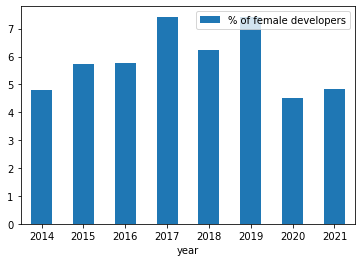

In [61]:
'''Calculating percentage of females in each year'''

females_2014 = df_2014['What is your gender?'].value_counts()['Female']/df_2014['What is your gender?'].count() * 100
females_2015 = df_2015['Gender'].value_counts()['Female']/df_2015['Gender'].count() * 100

females_2016 = df_2016['gender'].value_counts()['Female']/df_2016['gender'].count() * 100
females_2017 = df_2017['Gender'].value_counts()['Female']/df_2017['Gender'].count() * 100

females_2018 = df_2018['Gender'].value_counts()['Female']/df_2018['Gender'].count() * 100
females_2019 = df_2019['Gender'].value_counts()['Woman']/df_2019['Gender'].count() * 100

females_2020 = df_2020['Gender'].value_counts()['Woman']/df_2019['Gender'].count() * 100
females_2021 = df_2021['Gender'].value_counts()['Woman']/df_2019['Gender'].count() * 100

#bar plot to find the percentage of women respondents each year
female_growth_df = pd.DataFrame({'year':['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], 
                                 '% of female developers':[females_2014, females_2015, females_2016, females_2017, females_2018, females_2019, females_2020, females_2021]
                                }
                               )
female_growth_df.plot.bar(x='year', y='% of female developers', rot=0)

### Countries where the most developers are based in (last 5 years)

In [76]:
def country_with_most_developers(input_data, rows):
    """
        Input:
            input_data: dictionary with country name as key and num developers as value
            rows: total number of not-null records for a given year (input data)
        Output:
            country name with most developers and its value
    """
    
    country = max(input_data, key=input_data.get)
    developers_fraction = max(input_data.values())/rows * 100
    
    return country, developers_fraction

In [81]:
# df_2016["country"].value_counts()[0]

In [89]:
most_dev_2011 = country_with_most_developers(df_2011['What Country or Region do you live in?'].value_counts().to_dict(), df_2011['What Country or Region do you live in?'].count())
most_dev_2012 = country_with_most_developers(df_2012['What Country or Region do you live in?'].value_counts().to_dict(), df_2012['What Country or Region do you live in?'].count())

most_dev_2013 = country_with_most_developers(df_2013['What Country or Region do you live in?'].value_counts().to_dict(), df_2013['What Country or Region do you live in?'].count())
most_dev_2014 = country_with_most_developers(df_2014['What Country do you live in?'].value_counts().to_dict(), df_2014['What Country do you live in?'].count())

most_dev_2015 = country_with_most_developers(df_2015["Country"].value_counts().to_dict(), df_2015["Country"].count())

most_dev_2016 = country_with_most_developers(df_2016["country"].value_counts().to_dict(), df_2016["country"].count())
most_dev_2017 = country_with_most_developers(df_2017["Country"].value_counts().to_dict(), df_2017["Country"].count())

most_dev_2018 = country_with_most_developers(df_2018["Country"].value_counts().to_dict(), df_2018["Country"].count())
most_dev_2019 = country_with_most_developers(df_2019["Country"].value_counts().to_dict(), df_2019["Country"].count())

most_dev_2020 = country_with_most_developers(df_2020["Country"].value_counts().to_dict(), df_2020["Country"].count())
most_dev_2021 = country_with_most_developers(df_2021["Country"].value_counts().to_dict(), df_2021["Country"].count())

In [88]:
most_dev_2021

('United States of America', 18.322367238341783)

In [90]:
most_dev_location_dict = {
    '2011': most_dev_2011,
    '2012': most_dev_2012,
    '2013': most_dev_2013,
    '2014': most_dev_2014,
    '2015': most_dev_2015,
    '2016': most_dev_2016,
    '2017': most_dev_2017,
    '2018': most_dev_2018,
    '2019': most_dev_2019,
    '2020': most_dev_2020,
    '2021': most_dev_2021
}

In [91]:
most_dev_location_dict

{'2011': ('United States of America', 36.85145700071073),
 '2012': ('United States of America', 28.58744394618834),
 '2013': ('United States of America', 32.65243276534592),
 '2014': ('United States', 27.83882783882784),
 '2015': ('United States', 18.770520985798488),
 '2016': ('United States', 24.382293617634346),
 '2017': ('United States', 22.289461394769614),
 '2018': ('United States', 20.63021240717979),
 '2019': ('United States', 23.604241078973757),
 '2020': ('United States', 19.460918966163064),
 '2021': ('United States of America', 18.322367238341783)}

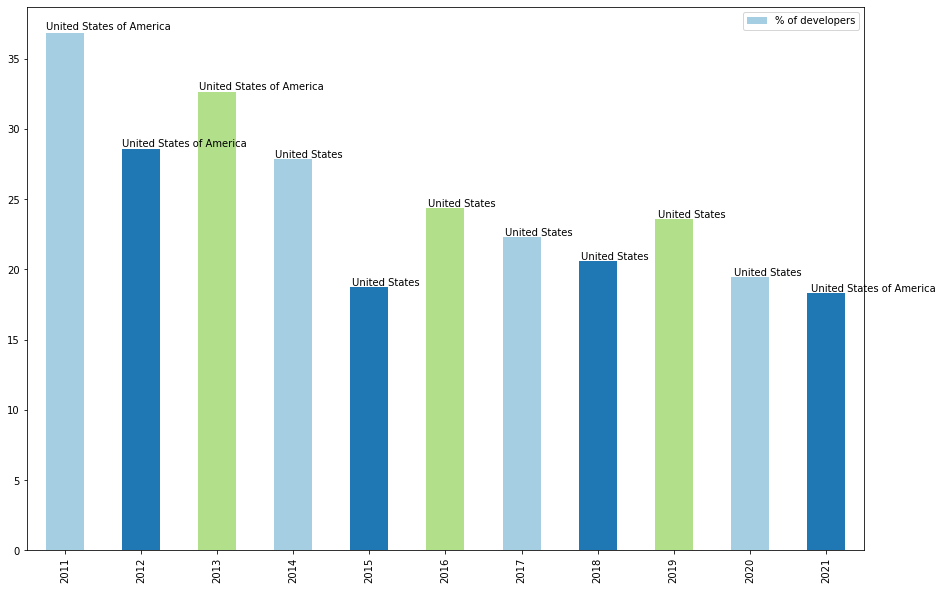

In [92]:
#bar chart to display the country with the most number of developers

df_most_dev_location = pd.DataFrame({'% of developers': list(map(lambda x: x[1], most_dev_location_dict.values()))},
                                    index = list(most_dev_location_dict.keys())
                                   ) 

ax = df_most_dev_location.plot.bar(figsize=(15,10), color=[plt.cm.Paired(np.arange(len(df)))])

for i, p in enumerate(list(ax.patches)):
    ax.annotate(str(list(map(lambda x: x[0], most_dev_location_dict.values()))[i]), (p.get_x() * 1.005, p.get_height() * 1.005))

### Get the most popular development environment

In [26]:
df_2017["IDE"]

0                                              Atom; Xcode
1        Atom; Notepad++; Vim; PyCharm; RubyMine; Visua...
2                              Sublime Text; Vim; IntelliJ
3        Notepad++; Sublime Text; TextMate; Vim; IPytho...
4                                                      NaN
                               ...                        
51387                          Sublime Text; Visual Studio
51388                    Notepad++; Sublime Text; NetBeans
51389                                                  NaN
51390                                    Emacs; Vim; Xcode
51391                    Notepad++; Eclipse; Visual Studio
Name: IDE, Length: 51392, dtype: object

In [27]:
def popular_dev_env(input_data):
    """Input: series where each entry corresponds to the user's response for most popular development environment
       Output: most popular envrionment name, and the fraction of users who uses this environment
    """
    
    dictionary = collections.defaultdict(int)
    
    ## iterate over each entry/record in the input
    for data in input_data:
        if not pd.isnull(data):
            dev_envs = [x.strip().lower() for x in data.split(";")]
            
            ## iterate over each environment (in case of multiple ones)
            for env in dev_envs:
                dictionary[env] += 1
    
    ## return the dictionary item with max. value
    return max(dictionary, key=dictionary.get), max(dictionary.values())/(input_data.count()) * 100

In [28]:
popular_dev_env(df_2017["IDE"])

('visual studio', 38.17192296957857)

In [30]:
pop_env_2017 = popular_dev_env(df_2017["IDE"])

pop_env_2018 = popular_dev_env(df_2018["IDE"])

pop_env_2019 = popular_dev_env(df_2019["DevEnviron"])

In [35]:
pop_dev_env_dict = {
    '2017': pop_env_2017,
    '2018': pop_env_2018,
    '2019': pop_env_2019
}

In [36]:
print(pop_dev_env_dict)

{'2017': ('visual studio', 38.17192296957857), '2018': ('visual studio code', 34.855035942597944), '2019': ('visual studio code', 50.747277162522764)}


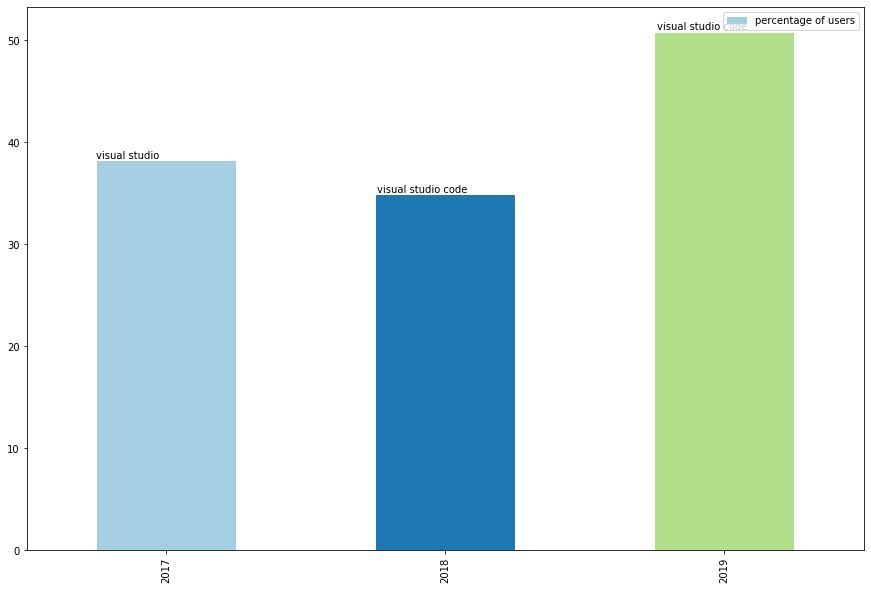

In [38]:
#bar chart to display the most popular IDE for each year

df = pd.DataFrame({'percentage of users': list(map(lambda x: x[1], pop_dev_env_dict.values()))},index=list(pop_dev_env_dict.keys()) ) 
ax = df.plot.bar(figsize=(15,10), color=[plt.cm.Paired(np.arange(len(df)))])

for i, p in enumerate(list(ax.patches)):
    ax.annotate(str(list(map(lambda x: x[0], pop_dev_env_dict.values()))[i]), (p.get_x() * 1.005, p.get_height() * 1.005))

### Data modeling

Data modeling is not needed in this specific use case as the business questions of interest could be answered directly via the route of Data exploration